## Introduction

This notebook aims to summarize my key learnings from year 1 at NYU Center for Data Science's MS in Data Science program. I hope it also serves as a sampler of topics that are covered in the program and an accessible guide to the building blocks that make up the knowledge of a data scientist. 

## Probability and Statistics

### Introduction

Throughout this notebook (and in data science generally), much of the theory is based on the fact that there is uncertainty in either the data, the model, or the solution. Afterall, if the problem was deterministic (A and B always lead to C), we would probably consider this more of a math problem than a data science problem.

Probability and statistics is important as a common language that we use to describe this uncertainty. They also help quantify a way of thinking that our brain is inherently bad at (for example, see [this article](https://builtin.com/data-science/probability)). 

Let's talk about on a high level what these are and why we need both.

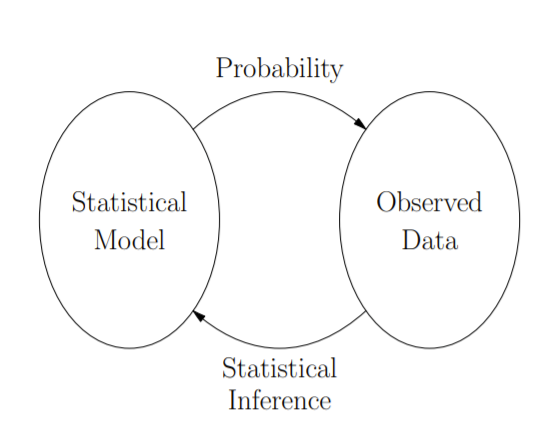

_Credits to Brett Bernstein._

Staistics helps us estimate properties of a probability distribution given the data generated from it. What does this mean?

A simple example: we roll a standard six-sided die. If we roll it enough times, we get the below results. 

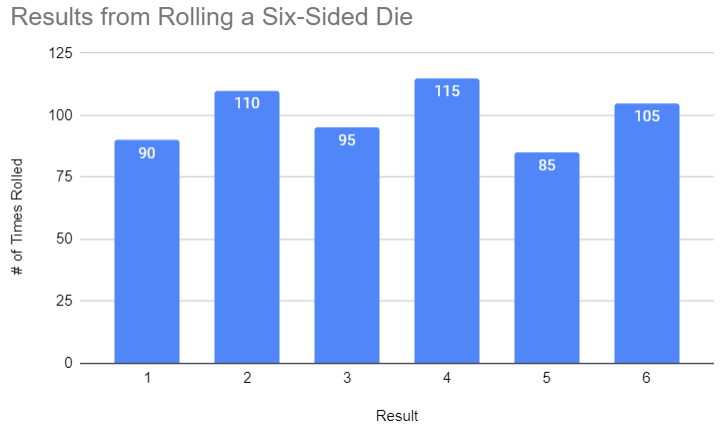

Of course, we know that the die should have an equal probability of rolling any particular result. But in practice with any given data set, we often don't know what that distribution _should_ be. If we didn't know that these results came from a standard six-sided die, what conclusions could we draw from these results? Would we still conclude that each number has an equal probability? How confident are we in the previous question? We aim to answer these questions via statistics, particularly via a statistical model that we hope estimates the true distribution accurately.

On the other hand, probability solves the reverse problem. Given a statistical model (i.e. a probability distribution), how do we calculate properties about the data? Particularly things such as probabilities of events of interests, or expectations (i.e. expected average over long run)? If we have a standard six-sided die, we can use probability theory to solve problems such as the probability of getting three 6s in a row or the standard deviation.

In data science, we can see why both are important. We use statistics to build a model from a data set, and we use probability to calculate useful information from that model. In the next couple sections, we go over key concepts from both  in greater detail.

### Key Concepts in Probability



To get started talking about probability, we need to define some basic terminology. 


__Random Variable__ : A variable that represents an uncertain quantity. Unlike a normal variable, it does not represent a fixed number, but a distribution. It should map every possible outcome to a real number.

A simple example: let's name a random variable $\tilde{c}$. Given a coin, $\tilde{c} = 1$ if the coin lands on heads and $\tilde{c} = 0$ if the coin lands on tails.

__Probability mass function / Probability density function__ : Random variables start to become very useful once we have tools to describe how they are distributed probabilistically. That's where probability mass functions and probability density functions come in. 

Let's take our random variable $\tilde{c}$ and describe how its outcomes are distributed. 


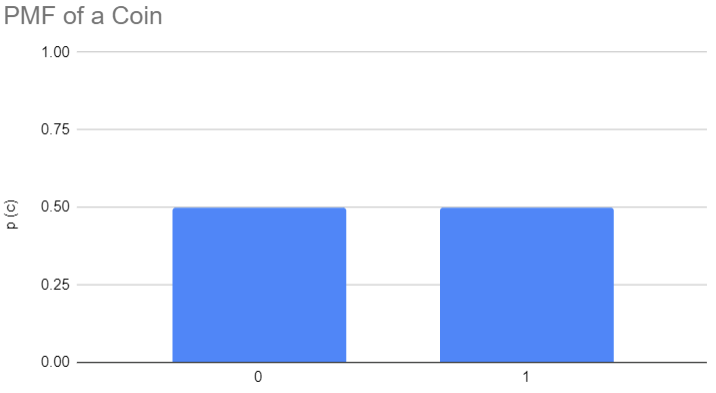

A probability mass function (pmf) maps each and every outcome (tails --> 0 and heads --> 1) to a probability (50% for each side of the coin). We say that $\tilde{c}$ is distributed according to this pmf, which we can call $p_{\tilde{c}}$.

A probability density function (pdf) works in a similar way but for continuous random variables, which have an infinite number of outcomes. To find the probability of a set of events, we integrate to find the area under the pdf. Things like temperature, time, or distance are usually described by pdfs.

It's very useful to be familiar with the common distributions which help us describe the probabilistic behavior of a given phenomena. For example, the Gaussian distribution (also known as normal distribution or bell curve) can approximate many things well such as human height or the sum of outcomes from rolling two dice. 

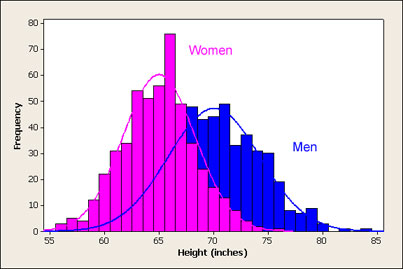

_An example where we see the observations of male and female heights represented by the bars can be approximated well by the normal distribution._

Mathematically speaking, the pmf or pdf will take the form of a function which takes an input (a given outcome) and returns the probability. For the Gaussian distribution, the pdf (for a Gaussian random variable we call $\tilde{a}$) looks like:

$$ f_{\tilde{a}}(a) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(a-\mu)^{2}}{2\sigma^{2}}}$$

where $\mu$ is the average and $\sigma$ is the standard deviation of the distribution. 

Let's take the blue line above and use a normal distribution to approximate it. Below, I recreate the graph (estimating average and standard deviation) with probability density ($f_{\tilde{a}}(a)$) on the y-axis.

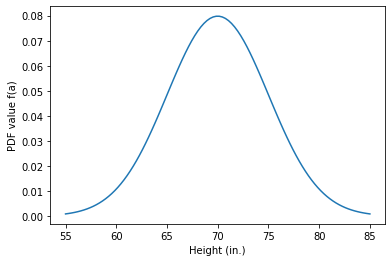

In [11]:
# Python is the language of choice in the program, and for many data scientists.

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 70
sigma = 5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel("Height (in.)")
plt.ylabel("PDF value f(a)")
plt.show()

Using the graph above, we see that the probability density is the highest at 70 inches. However, if we want to find the probability of an event using this graph, we must select a range and integrate to find the area under it. For example, we could calculate that the probability that the height of a male is between 65 and 75 is 68.3% (see graph and calculations below).

Alternatively, we can use the __cumulative distribution function (cdf)__, which tells us the probability that $\tilde{a}$ is lower than a given height $a$.

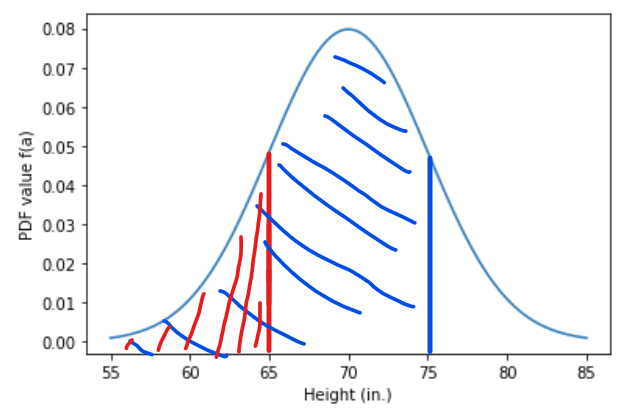

In [15]:
probability_under_65 = stats.norm.cdf(65,mu,sigma)
probability_under_75 = stats.norm.cdf(75,mu,sigma)

probability_between_65_and_75 = probability_under_75 - probability_under_65 
print(probability_between_65_and_75)

0.6826894921370859


With that, we have the basic probability tools we need to dive deeper. For readers unfamiliar with basic probability rules related to conditional probability and independence, I would recommend reviewing these as they are fairly straightforward rules related to computation and will not be restated here.

#### Expectation and Variance

Averaging is an important tool in mathematics, and it is no different with random variables. We can take averages of random variables by taking their expected values. This works slightly differently with discrete and continuous random variables.
 
For the discrete case, let's go back to our pmf of flipping a coin. For a discrete r.v. $\tilde c$ where it takes an outcome $c$, we multiply each possible outcome by the probability of the random variable taking that value. Generally speaking, the expectation or mean, $E(\tilde{c})$, is calculated:

$$E(\tilde{c}) = \sum_{c \in C} c p_{\tilde{c}}(c)$$

In the case of the coin flip (which is represented by a distribution called the Bernoulli distribution), our calculation is:

$$ 0 * p_{\tilde{c}}(0) + 1 * p_{\tilde{c}}(1) = .5 $$

For the continuous case, since we have infinite outcomes, the calculation is slightly different. Given a continous r.v. $\tilde b$, our expectation is:

$$E(\tilde{b}) = \int_{b = -\infty}^{b=\infty} b f_{\tilde{b}}(b)$$

What other useful things can we do with expectation? How about understanding the typical variation around the mean we just calculated, aka variance?

In many practical cases, you have probably estimated variance by taking the average squared deviation from the sample mean. Expectation allows us to calculate the actual variance if we know how the r.v. is distributed. We can find the variance by calculating the following:

$$Var(\tilde{b}) = E( [\tilde{b}-E(\tilde{b})]^{2} ) = E(\tilde{b}^{2}) - E^{2}(\tilde{b})$$

We won't go too much into the details of how the variance of different distributions are derived here, but see below for a visual representation of the expectation and variance given some common distributions with the stated parameters.

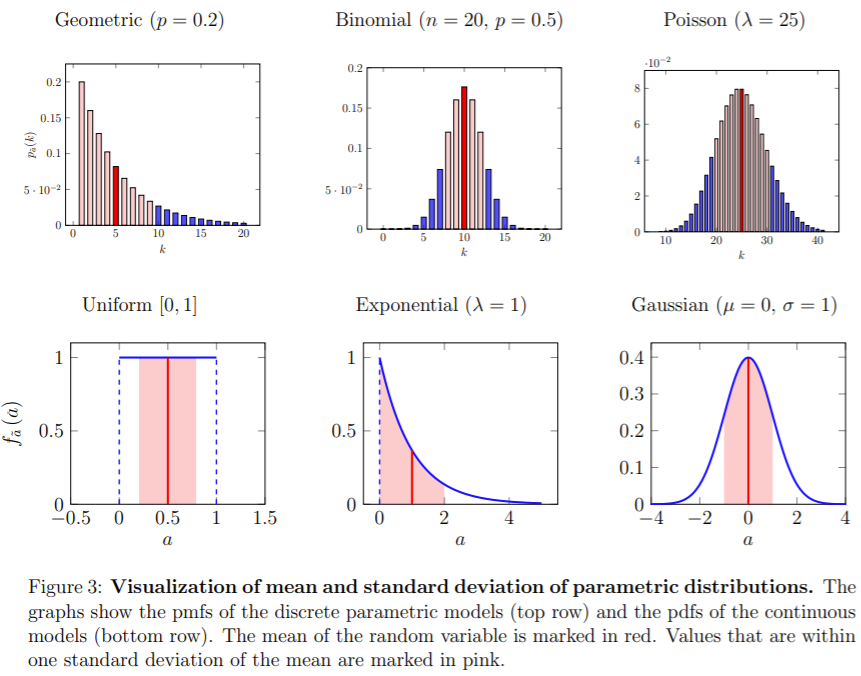

_Credits to Carlos Fernandez-Granda_

#### Bonus Topics: Law of Large Numbers & Central Limit Theorem

The final (bonus) topics we consider within probability theory (though many of these ideas have overlap and use cases in other fields) is the law of large numbers and central limit theorem. You won't need these to follow along for the rest of the document, but are very useful results from probability. 

__Law of large numbers__

Much of the concepts discussed above require either knowledge of the way data is distributed or at least an assumption about it. The (weak) law of large numbers is one of the first results discussed that helps us uncover information about the distribution from simply observing data. It states that given a sequence of independent and identically distributed (iid) random variables (a common simplifying assumption about observed data) $\tilde{a}_{i}$ for $i = 1,...,n$, the sample mean of the sequence will converge to the true mean $\mu$ as $n$ increases.

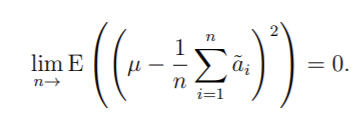

The most useful application of the law of large numbers is its justification of using empirical probabilities to estimate the value of a random variable taking a certain value. Going back to our example of the coin and the random variable $\tilde{c}$, let's say we wanted to check if it was truly a fair coin (50/50 probability). We flip the coin $n$ times and receive the results $\tilde{c}_{1}, \tilde{c}_{2},...,\tilde{c}_{n}$. If we take enough samples, we expect the sample mean to be equal to the true probability that the coin lands on heads (recall that $\tilde{c} = 1$ for heads and $\tilde{c} = 0$ for tails).

__Central Limit Theorem__

Finally, we reach one of the most interesting results in probability - the central limit theorem. The law of large numbers establishes that the sample mean will converge to the real mean, but it does not provide information about its distribution. The central limit theorem tells us that the distribution of the sample means will converge to a Gaussian with specific properties as stated below:

_Given a sequence of iid random variables ( $\tilde{a}_{1}, \tilde{a}_{2}, ...,\tilde{a}_{n}$ ) with mean $\mu$ and variance $\sigma^{2}$ The running average of the sequence $\frac{1}{n} \sum^{n}_{i=1} \tilde{a}_{i}$ converges to a Gaussian with mean $\mu$ and variance $\frac{\sigma^{2}}{n}$ in distribution, which means that its pdf is arbitrarily well approximated by the pdf of the Gaussian. In the case of discrete random variables, it means that the normalized histogram is arbitarily well approximated by the pdf of the Gaussian._

This gives us an idea of much the sample mean we calculate might deviate from the actual mean. Interestingly, $\tilde{a}$ can be distributed according to any distribution, but the distribution of the sample mean will converge to a Gaussian regardless. See below for examples where the samples are Bernoulli or Exponential. 

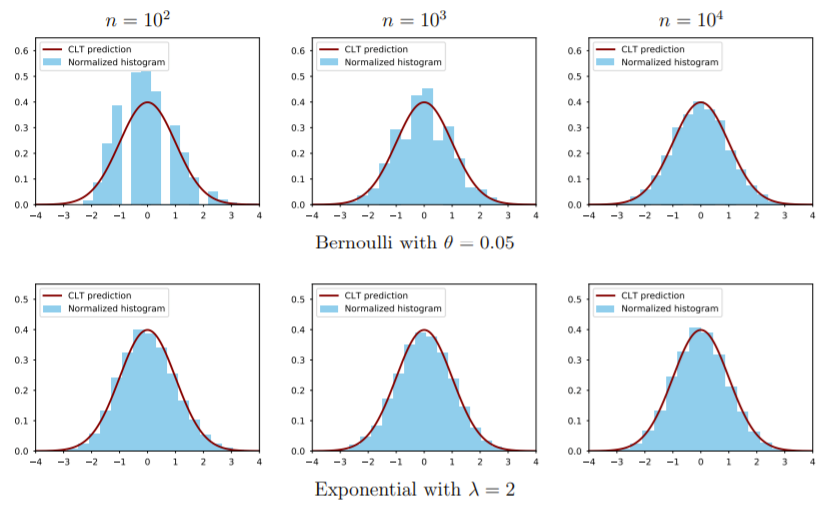

If you're interested in testing this our for yourself, try the simulation here: https://onlinestatbook.com/stat_sim/sampling_dist/index.html. Alter the first graph representing the parent population however you want, then take samples of that distribution using the second graph. You will see that the third graph will resemble a Gaussian no matter the original distribution with enough samples.

### Key Concepts in Statistics

We move onto statistics next, where many of the topics are very practically relevant. As data scientists, we are generally limited to finding insights from our collected data, which represents some subset of the actual population. We need to understand the limitations of working from a sample, what conclusions we can draw from it, and how confident we can be in those conclusions. Statistics helps us do this. For those job searching, these are also prime topics for interview questions!

We start with some terminology once again:

__Statistical Model__ : A collection of random variables of interest, and a family of possible joint distributions for those random variables. A model is called _parametric_ if there is a finite list of numbers, called __parameters__, that determine which joint distribution from the family is used. 

For example, consider an additive normal error model $\tilde{x}_{1}, \tilde{x}_{2},..., \tilde{x}_{n}$ where each r.v. is independent and normally distributed with mean $\mu$ and variance $\sigma^{2}$. This is used to model the variability in $n$ independent samples of a quantity with true value $\mu$. This is a very common base model with various possible adjustments added on such as bias (if $\mu$ cannot be measured accurately in practice).

Note that the discussion on properties of and techniques related to models in this section can apply both to simple models and more complex models that are commonly thought of when data science comes to mind (with varying levels of usefulness depending on the model setup).  

__Statistic__ : A quantity (which is random because the data is also random, such as in the additive normal error model) computed from the observable data of a statistical model. If r is a function, then $T := r(\tilde{x}_{1}, \tilde{x}_{2},..., \tilde{x}_{n})$ is a statistic. The distribution of $T$ is called the __sampling distribution__. The sample mean (often written as $\bar{X}$) is an example of a statistic, and the central limit theorem (discussed above) gives us information about its sampling distribution. 

That's enough for now to get us started on some useful statistics tools!



#### Confidence Intervals

When we calculate a statistic, we often do so to estimate a quantity associated with the statistical model. Confidence intervals are a method by which we can express the probability of the quantity (which we can call $\theta$) falling within a certain range. 

If L, U are statistics, and $P(L \leq \theta \leq U) = \alpha$, then $[L,U]$ is a level $\alpha$ confidence interval for $\theta$.

A common example used in problem sets is estimating the 95% confidence interval for the sample mean. Let's look at this from the perspective of the additive normal error model we descrived earlier. Note that the sample mean (being a sum of normal r.v. divided by $n$) is distributed with mean $\mu$ and variance $\frac{\sigma^{2}}{n}$ (Note that $Var(\bar{X}) = Var(\frac{\tilde{x}_{1} + \tilde{x}_{2} +...+ \tilde{x}_{n}}{n}) = \frac{n \sigma^{2}}{n^{2}} = \frac{\sigma^{2}}{n}$). With some knowledge about the normal distribution CDF, we know that we can find roughly 95% of the probability density within 2 standard deviations of the mean. So our final answer is [$\bar{X}-2\frac{\sigma}{\sqrt{n}}$,$\bar{X}+2\frac{\sigma}{\sqrt{n}}$].

One very important note on the interpretation of confidence intervals once calculated - it does NOT represent the probability that $\mu$ falls in that interval. This might be confusing, but keep in mind that we view our sample as random, and our confidence interval can change from one experiement to the next depending on our data. The correct framing is to say: if we followed this procedure for creating confidence intervals for many experiments, 95% of the intervals calculated would contain the true $\mu$.

As a final final note, bootstrapping is a very common and convenient method for generating confidence intervals. There are several ways to approach this which we will not into detail on, but essentially, we can resample our data to simulate data from new experiments. The distribution of the statistic of interest from these simulations can allow us to easily calculate confidence intervals (e.g. See below GIF. In 100 bootstrap simulations, 95% of the sample means calculated roughly fall within -.1 and .8. Therefore, this is our 95% confidence interval). 

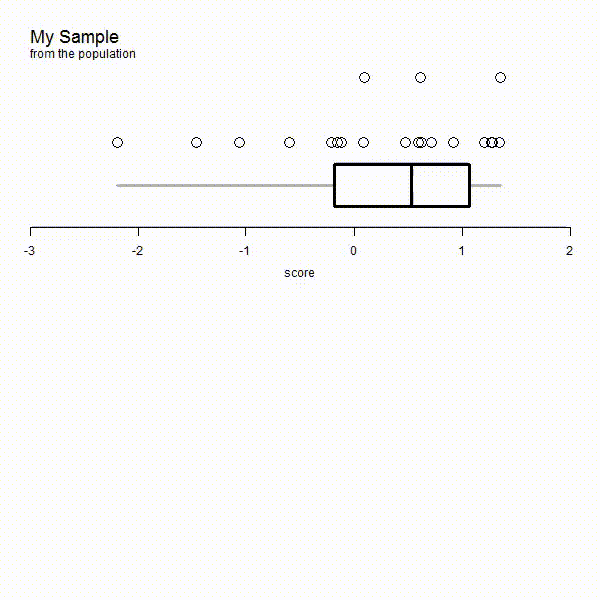

_Source: https://www.stat.auckland.ac.nz/~wild/BootAnim/_

#### Maximum Likelihood Estimation

We have some idea of what models are, how to calculate statistics associated with them, and how confident we can be in those statistics. But how do we define the actual model? Generally speaking, the practitioner will choose the family of functions that best models the phenomena, but the specific parameters will need to be estimated somehow.  

Let's take a very simple example using our additive normal error model. We want to use it to simulate male height, similar to the examples mentioned earlier. We believe a normal distribution can approximate the true distribution effectively as most peoples' heights ($\tilde{x}_{1}, \tilde{x}_{2},..., \tilde{x}_{n}$) will converge around a certain number $\mu$ with some variance $\sigma^{2}$. But how can we actually guess what $\mu$ and $\sigma^{2}$ are?

Cue __maximum likelihood estimation__ - an extremely common and intuitive method to estimate those parameters. At a high level, it states that we set the parameters according to what maximizes the probability (or density for continuous variables) of the observations. In our example, if we see 10 people with a height of exactly 70 inches, then our best guess at $\mu$ and $\sigma^{2}$ are 70 and 0, respectively.

We can be more mathetically precise in our definition:

$\tilde{x}_{1}, \tilde{x}_{2},..., \tilde{x}_{n}$ are distributed to some joint distribution with pdf or pmf $f$, where f is determined by parameter values $\theta_{1},\theta_{2},...,\theta_{p}$. The __likelihood function__ is given by:

$$ L(x_{1},x_{2},...,x_{n};\theta_{1},\theta_{2},...,\theta_{p}) = f_{\tilde{x}_{1}, \tilde{x}_{2},..., \tilde{x}_{n}}(x_{1},x_{2},...,x_{n};\theta_{1},\theta_{2},...,\theta_{p}) $$

Note that $x_{1},x_{2},...,x_{n}$ represent actual observed values. $\hat{\theta_{1}},\hat{\theta_{2}},...,\hat{\theta_{p}}$ are __maximum likelihood estimators__ (or MLEs) for $\theta_{1},\theta_{2},...,\theta_{p}$ at the observed values $x_{1},x_{2},...,x_{n}$ if they maximize $L$.

#### Hypothesis Testing

We will broach one more substantial topic in statistics - hypothesis testing. Hypothesis testing is a statistical procedure for choosing between alternative scenarios (i.e. parameters) for a model. There is a ton of terminology associated specifically with testing which we will carefully introduce with examples. 

Let's start by elaborating a bit more on the purpose of a hypothesis test. We go back to our example of the coin flip. We expect it to be a fair coin i.e. each sample is an iid Bernoulli variable with $p = .5$. But what if we actually wanted to test if it was not? Specifically if $p > .5$? 

A hypothesis test allows us to possibly reject the __null hypothesis__ if there is compelling evidence (i.e. the status quo, our assumption that the coin is fair) and accept that the __alternative hypothesis__ is reasonable (probability of heads is greater than 50%).

What does compelling evidence look like? In our example, we may look at the number of heads in 100 coin flips. If the null hypothesis was true, we would probably not expect more than 75 heads in 100 flips. If we see more than that, we would be inclined to reject our null hypothesis. The number of heads is the __test statistic ($T$)__  we set. Our __rejection region__ 75-100 heads is the region in which we will reject the null hypothesis if $T$ falls within it.

To recap, a hypothesis test consists of the following steps:

1) Choose two sets of parameters for a given parametic model: the null hypothesis $\Theta_{0}$ and the alternative hypothesis $\Theta_{1}$. There should be no intersection between the sets, and the two sets should span all possible parameters. 
_(Notice that there is a slight problem with my coin example according to this definition...)_

2) Choose $T$, the test statistic.

3) Choose $R$, the rejection region.

4) The test rejects the null hypothesis if $T \in R$ and fails to reject the null hypothesis if $T \notin R$.

To allow us to be more precise in our discussion, let's define some more terminology.

- __Type I Error__ - when the test rejects a null hypothesis that is actually true. In our example, it is when we obtain a result of >= 75 heads even though it is a fair coin. 
- __Type II Error__ -  when the test does not reject a null hypothesis that is false. In our example, it is when we obtain a result of < 75 heads even though it is an unfair coin (in favor of heads).
- __Significance Level__ - A hypothesis test has a significance level $\alpha$ when $P(T \in R;\theta) \leq \alpha$ where $\theta \in \Theta_{0}$. In other words, if we pick the most favorable parameter in the null hypothesis set for rejecting the null hypothesis, what is the probability that we reject? 
- __Power function__ - a function which calculates the probability of rejecting the null hypothesis given a parameters - $\pi(\theta) = P(T \in R; \theta)$
- __P-value__ -



# WIP

definitions/terminology

hypothesis testing

bayesian inference (touched on more in machine learning)
misc.
 
simple linear models (touched on more in linear algebra)


In [ ]:
3 blue 1 brown 

vectors/matrices
    kernel/image/rank

inner product

eigenvalues/eigenvectors and markov chains

spectral theorem/pca/sva

convexity/least squares (linear model)

gradient descent 

misc
clustering

In [ ]:
data science/ML concepts

bias variance
